# Heat Equation

Solving

$$
\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = 0
$$

Using [MethodOfLines.jl](http://methodoflines.sciml.ai/dev/) to sumbolically define the PDE system using the finite difference method (FDM).

From the [MethodOfLines tutorial](https://docs.sciml.ai/MethodOfLines/stable/tutorials/heat/).

## 2D Steady-state Heat equation

In [1]:
using ModelingToolkit
using MethodOfLines
using DomainSets
using NonlinearSolve
using Plots

In [2]:
@parameters x y
@variables u(..)

Dxx = Differential(x)^2
Dyy = Differential(y)^2

# PDE equation
eq = Dxx(u(x, y)) + Dyy(u(x, y)) ~ 0

# Boundary conditions
bcs = [u(0, y) ~ x * y,
       u(1, y) ~ x * y,
       u(x, 0) ~ x * y,
       u(x, 1) ~ x * y]

# Space and time domains
domains = [x ∈ Interval(0.0, 1.0),
           y ∈ Interval(0.0, 1.0)]

@named pdesys = PDESystem([eq], bcs, domains, [x, y], [u(x, y)])

PDESystem
Equations: Equation[Differential(x)(Differential(x)(u(x, y))) + Differential(y)(Differential(y)(u(x, y))) ~ 0]
Boundary Conditions: Equation[u(0, y) ~ x*y, u(1, y) ~ x*y, u(x, 0) ~ x*y, u(x, 1) ~ x*y]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(x, 0.0..1.0), Symbolics.VarDomainPairing(y, 0.0..1.0)]
Dependent Variables: Num[u(x, y)]
Independent Variables: Num[x, y]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [7]:
# Discretization of 2D sapce
N = 10
dx = 1 / N
dy = 1 / N

# Note that we pass in `nothing` for the time variable here,
# since we are creating a stationary problem without a dependence on time, only on space.
discretization = MOLFiniteDifference([x => dx, y => dy], nothing, approx_order=2, grid_align=edge_align)

MOLFiniteDifference{MethodOfLines.EdgeAlignedGrid, MethodOfLines.ScalarizedDiscretization}(Dict{Num, Float64}(y => 0.1, x => 0.1), nothing, 2, UpwindScheme(1), MethodOfLines.EdgeAlignedGrid(), true, false, MethodOfLines.ScalarizedDiscretization(), Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}())

indexmap = Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64}(y => 2, x => 1)
(x, args[j]) = (0.0, x)
(x, args[j]) = (y, y)
indexmap = Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64}(y => 2, x => 1)
(x, args[j]) = (1.0, x)
(x, args[j]) = (y, y)
indexmap = Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64}(y => 2, x => 1)
(x, args[j]) = (x, x)
(x, args[j]) = (0.0, y)
indexmap = Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64}(y => 2, x => 1)
(x, args[j]) = (x, x)
(x, args[j]) = (1.0, y)
indexmap = Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64}(y => 2, x => 1)
(x, args[j]) = (0.0, x)
(x, args[j]) = (y, y)
indexmap = Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64}(y => 2, x => 1)
(x, args[j]) = (1.0, x)
(x, args[j]) = (y, y)
indexmap = Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64}(y => 2, x => 1)
(x, args[j]) = (x, x)
(x, args[j]) = (0.0, y)
indexmap = Dict{Sym{Real, Base.ImmutableDict{DataType, Any}}, Int64}(y => 2, x => 1

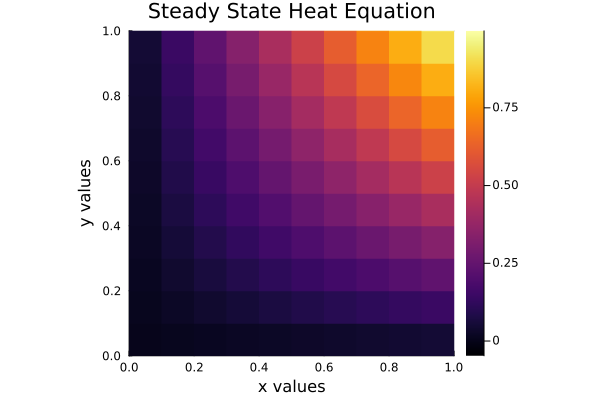

In [8]:
# The corresponding problem for this is a NonlinearProblem
prob = discretize(pdesys, discretization)
sol = NonlinearSolve.solve(prob, NewtonRaphson())

heatmap(sol[x], sol[y], sol[u(x, y)], 
        xlabel="x values", ylabel="y values", title="Steady State Heat Equation", 
        aspect_ratio=:equal, xlims=(0.0, 1.0), ylims=(0.0, 1.0))

## Runtime information

In [5]:
versioninfo()

Julia Version 1.8.3
Commit 0434deb161 (2022-11-14 20:14 UTC)
Platform Info:
  OS: Windows (x86_64-w64-mingw32)
  CPU: 12 × Intel(R) Core(TM) i7-8750H CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-13.0.1 (ORCJIT, skylake)
  Threads: 12 on 12 virtual cores
Environment:
  JULIA_NUM_THREADS = 12
  JULIA_PROJECT = @.


In [6]:
using Pkg
Pkg.status()

Status `D:\github\pde\Project.toml`
  [5b8099bc] DomainSets v0.5.14
  [7ed4a6bd] LinearSolve v1.31.0
  [94925ecb] MethodOfLines v0.7.0
  [961ee093] ModelingToolkit v8.36.0
  [8913a72c] NonlinearSolve v1.0.1
  [1dea7af3] OrdinaryDiffEq v6.34.1
  [91a5bcdd] Plots v1.36.6
  [c3572dad] Sundials v4.11.1
  [37e2e46d] LinearAlgebra
  [9a3f8284] Random
